Author:Sanjoy Basu


<b>Introduction</b>

This project intend to use KMeans clustering to compress an image.This  technique is based on paper published by Gersho and Gray in 1992 . It works by clustering similar pixels and representing  pixels in a cluster by cluster centroid, collection of centroids is called codebook. The process is also called as Vector Quantization(VQ) and the process is used for various signal compression. 

<b>Data</b>

Data is an image of Tofukuji temple, in southeastern Kyoto,Japan. I (Sanjoy Basu) am the photographer of the image.



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn import decomposition as dcmp
from sklearn import preprocessing as prep
from sklearn import cluster
import matplotlib.image as mpimg
from skimage.io import imread, imshow, imsave
import os

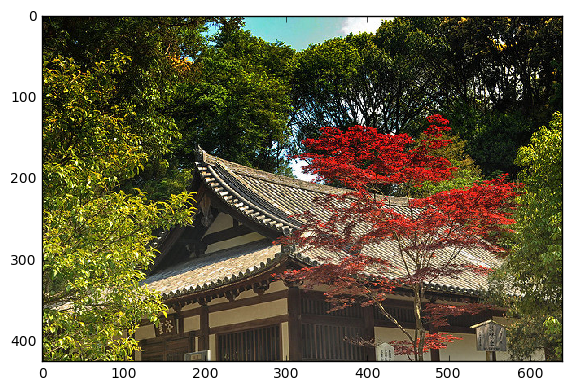

In [3]:
#Loading the data
kyoto=imread("kyoto.jpg")
#Displaying the image
imshow(kyoto)

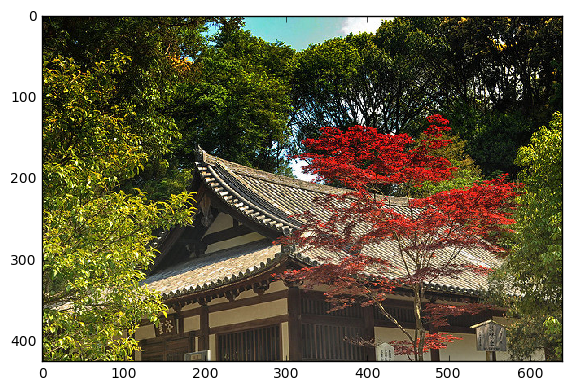

In [5]:
# Making the image compatible with matplotlib 
# Matplotlib represent RGB from value 0 to 1
kyoto_f64=kyoto.astype(dtype=np.float64)/255
#Ensuring conversion did not significantly alter the image
imshow(kyoto_f64)

In [6]:
# Determining the shape
kyoto_f64.shape

(425, 640, 3)

In [10]:
kyoto_f64.shape[2]

3

Unlike most dataset which is AxB matrix image is AxBxC matrix. In other word image is reprented by

(Height x Width x Pixels) matix. 

In [11]:
# Extracting pixel from data set
px_d=[] #Temporarily store the pixel after grabbing the pixel at a locaton
px_v=[] # Warehousing the pixels

for i in range(kyoto_f64.shape[0]):
    for j in range(kyoto_f64.shape[1]):
      
      
        for k in kyoto_f64[i, j,:]:
           
            px_d.append(k)
           
        px_v.append(px_d) #Storing the the pixel 
        px_d=[] #Empties the pixel to grab a new one
        
# Turning the data into an array
vArray=np.array(px_v)

# Turning the araray into feature vector

vArrayDF=pd.DataFrame(vArray, columns=['r', 'g', 'b'])
vArrayDF.head(10) #Displaying the pixels

,r,g,b
0,0.050980,0.035294,0.023529
1,0.082353,0.066667,0.031373
2,0.078431,0.066667,0.000000
3,0.062745,0.054902,0.000000
4,0.117647,0.098039,0.011765
5,0.094118,0.074510,0.000000
6,0.113725,0.090196,0.043137
7,0.117647,0.090196,0.066667
8,0.125490,0.031373,0.000000
9,0.466667,0.415686,0.141176


<b>K-Means Clustering</b>

In [12]:
km=cluster.KMeans(init='k-means++', n_clusters=64, n_init=10)
km.fit(vArrayDF)
ym=km.predict(vArrayDF)

<b> Generating codebook</b>

In [20]:
codebook=km.cluster_centers_


<b>Building function to recreate image </b>

In [15]:
def recreate_image(codebook, labels, y, x):
    #Creating all zero 3 dimension matrix. Information from codebook will be used to generate the pixels
    image = np.zeros((y, x, codebook.shape[1])) 
    label_idx = 0
    for i in range(y):
        for j in range(x):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

<b>Recreating the image</b>

In [16]:
image=recreate_image(km.cluster_centers_, ym, kyoto_f64.shape[0], kyoto_f64.shape[1])
#Verifying the shape of image 
image.shape

(425, 640, 3)

Shape of the new image is same as the original.So we will display the image


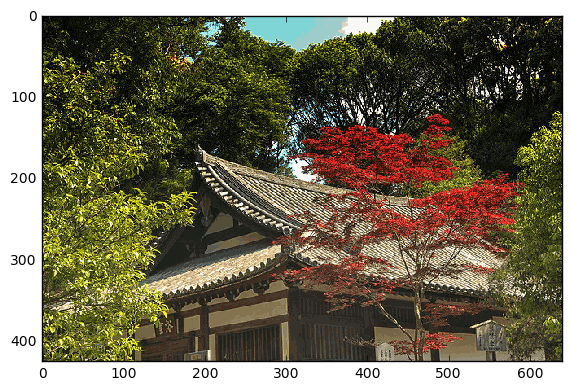

In [17]:
imshow(image)

New image looks similar to the original image without significant loss of information.
We will now save the image onthe disk for validation. We will call new image kyoto_compressed.jpg

In [18]:
imsave('kyoto_compressed.jpg', image)

/home/sanjoybasu/anaconda2/envs/datascience/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


<b>Validation</b>

In [19]:
origInal=os.path.getsize("kyoto.jpg")
compRessed=os.path.getsize("kyoto_compressed.jpg")
100*(origInal-compRessed)/origInal

54

<b>Conclusion</b>

Compressed image size is 54% the size of original image
